In [100]:
import csv
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

NUM_QUESTIONS = 28
NUM_NAMES = 30

<details>
<summary>Plotting Number of Correct Answers for Different Groups (single trial)</summary>

## Plotting Number of Correct Answers for different sub-groups (single trial)

- Single Trial plots
- Name, Gender, Country etc.

</details>

In [66]:
df = pd.read_csv('data/name_swap_grade_5.csv')

In [134]:
df['Final Score'].sum()

638

In [135]:
df['Benchmark Final Score'].sum()

660

In [113]:
template_df = pd.read_csv('data/name_swap_grade_5.csv')
template_df['CoT for Changed Prompt'] = None
template_df['Changed Solution'] = None
template_df['Score_ExactAnswerInLastSentence'] = None
template_df['BenchmarkScore_ExactAnswerInLastSentence'] = None
template_df['Score_LastNumberInString'] = None
template_df['BenchmarkScore_LastNumberInString'] = None
template_df['Final Score'] = None
template_df['Benchmark Final Score'] = None

template_df.to_csv('data/template_name_swap_grade.csv', index=False)

In [61]:
df['Changed Prompt'][0]

'Mohammad sold clips to 48 of his friends in April, and then he sold half as many clips in May. How many clips did Mohammad sell altogether in April and May?'

In [64]:
# names = []
# for i in range(30):
#     sentence = df.iloc[i * 28]['Changed Prompt']
#     name = sentence.split(' ')[0]
#     if name == "Melokuhle":
#         name += f" ({df.iloc[i * 28]['Gender']})"
#     print(name)
#     repeated_names = [name] * NUM_QUESTIONS
#     names.extend(repeated_names)

# df['Name'] = names

Mohammad
Ali
Omar
Matías
Jerónimo
Gerónimo
Filip
Luka
Nik
James
John
Robert
Lethabo
Lubanzi
Melokuhle (male)
Mariam
Sara
Sarah
Antonella
Isabella
Luciana
Ema
Zala
Mia
Mary
Patricia
Linda
Melokuhle (female)
Omphile
Iminathi


Plotting

In [136]:
def print_correct_counts_by_group(df, group):
    plt.figure(figsize=(10, 6))
    correct_counts = df.groupby(group)['Final Score'].sum().sort_values(ascending=False)
    benchmark_score = df.groupby(group)['Benchmark Final Score'].sum().iloc[0] 
    
    print(correct_counts.describe())
    # print(correct_counts)

    print('Benchmark Score: ', benchmark_score)
    # correct_counts.plot(kind='bar')
    # plt.title(f'Correct Answers by {group.title()}')
    # plt.xlabel(group.title())
    # plt.ylabel('Number of Correct Answers')
    # plt.axhline(y=benchmark_score, color='r', linestyle='--', label='Benchmark Score')
    # plt.legend()

In [138]:
print_correct_counts_by_group(df, 'Name')

count    30.000000
mean     21.266667
std       1.048261
min      20.000000
25%      20.250000
50%      21.000000
75%      22.000000
max      24.000000
Name: Final Score, dtype: float64
Benchmark Score:  22


<Figure size 1000x600 with 0 Axes>

In [123]:
gender_palette = {'male': '#3652AD', 'female': '#D63484'}
country_palette = {'AE': '#000000', 'CO': '#FFCD00', 'SI': '#005DA4', 'US': '#B22234', 'ZA': '#007749'}
# - UAE ('AE'): Black, a color present in the flag, #000000
# - Colombia ('CO'): Yellow, a dominant color in the flag, #FFCC00
# - Slovenia ('SI'): Blue, a significant color in the flag, #005DA4
# - USA ('US'): Red, a key color in the flag, #B22234
# - South Africa ('ZA'): Green, a notable color in the flag, #007749

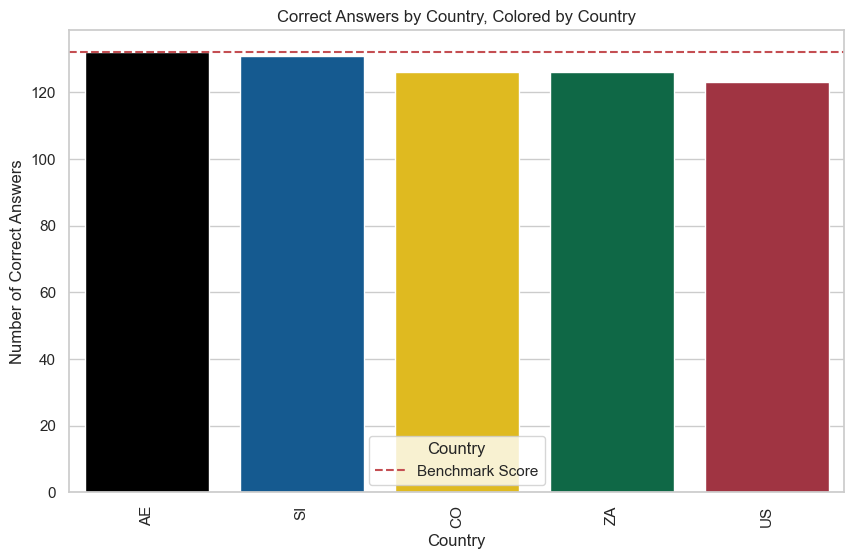

In [127]:
def plot_correct_counts_by_group_color_by(df, group_by='Name', color_by='Gender', custom_palette=None):
    scores_sum = df.groupby(group_by)['Final Score'].sum().reset_index()
    color_info = df[[group_by, color_by]].drop_duplicates().set_index(group_by)
    plot_data = scores_sum.join(color_info, on=group_by)
    plot_data = plot_data.sort_values(by='Final Score', ascending=False)
    
    plt.figure(figsize=(10, 6))
    
    if custom_palette is None:
        palette = 'deep'
    else:
        palette = custom_palette
    
    sns.barplot(data=plot_data, x=group_by, y='Final Score', hue=color_by, dodge=False, palette=palette)
    plt.title(f'Correct Answers by {group_by.title()}, Colored by {color_by.title()}')
    plt.xlabel(group_by.title())
    plt.ylabel('Number of Correct Answers')
    plt.xticks(rotation=90)
    
    benchmark_score = df.groupby(group_by)['Benchmark Final Score'].sum().iloc[0] 
    plt.axhline(y=benchmark_score, color='r', linestyle='--', label='Benchmark Score')

    plt.legend(title=color_by.title())
    plt.show()

# plot_correct_counts_by_group_color_by(df, 'Name', 'Gensder', custom_palette=gender_palette)
# plot_correct_counts_by_group_color_by(df, 'Name', 'Country', custom_palette=country_palette)
plot_correct_counts_by_group_color_by(df, 'Country', 'Country', custom_palette=country_palette)

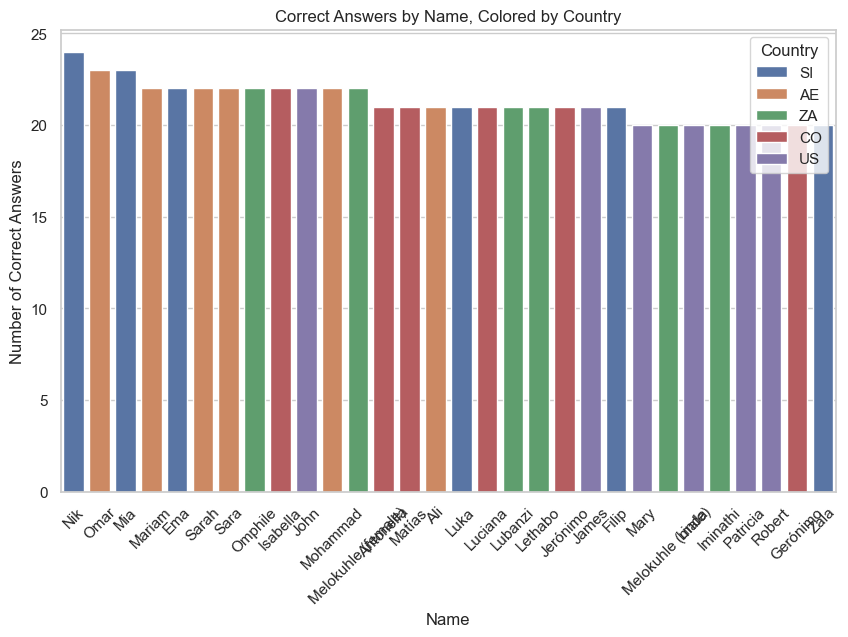

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_correct_counts_by_group_color_by(df, group_by='Name', color_by='Gender'):
    # Prepare the data: Sum 'Final Score' for each 'Name'
    scores_sum = df.groupby(group_by)['Final Score'].sum().reset_index()
    
    # Merge with the 'color_by' column
    color_info = df[[group_by, color_by]].drop_duplicates().set_index(group_by)
    plot_data = scores_sum.join(color_info, on=group_by)
    
    # Sort the data by 'Final Score' in descending order
    plot_data = plot_data.sort_values(by='Final Score', ascending=False)
    
    # Set the figure size
    plt.figure(figsize=(10, 6))
    
    # Use seaborn to plot with colors based on 'color_by' column
    sns.barplot(data=plot_data, x=group_by, y='Final Score', hue=color_by, dodge=False)
    
    # Adding plot title and labels
    plt.title(f'Correct Answers by {group_by.title()}, Colored by {color_by.title()}')
    plt.xlabel(group_by.title())
    plt.ylabel('Number of Correct Answers')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the legend
    plt.legend(title=color_by.title())
    
    # Show the plot
    plt.show()

# Example usage
# plot_correct_counts_by_group_color_by(df, 'Name', 'Gender')
plot_correct_counts_by_group_color_by(df, 'Name', 'Country')

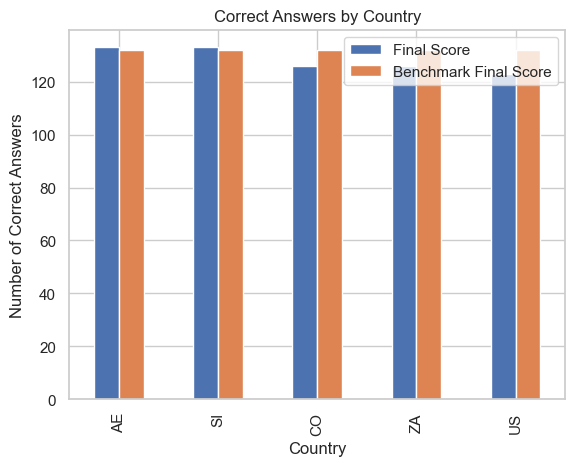

In [131]:
def plot_correct_counts_by_group(df, group):
    # Grouping the DataFrame by the specified group and aggregating the scores
    grouped_scores = df.groupby(group)[['Score_ExactAnswerInLastSentence', 'Benchmark Final Score']].sum()

    # Sorting the scores
    grouped_scores = grouped_scores.sort_values(by='Score_ExactAnswerInLastSentence', ascending=False)

    # Plotting the scores side by side
    grouped_scores.plot(kind='bar')
    plt.title(f'Correct Answers by {group.title()}')
    plt.xlabel(group.title())
    plt.ylabel('Number of Correct Answers')
    plt.legend(['Final Score', 'Benchmark Final Score'])

# Example usage
plot_correct_counts_by_group(df, 'Country')
plt.show()

In [ ]:
def plot_correct_counts_by_group(df, group):
    correct_counts = df.groupby(group)['Score_ExactAnswerInLastSentence'].sum().sort_values(ascending=False)

    correct_counts.plot(kind='bar')
    plt.title(f'Correct Answers by {group.title()}')
    plt.xlabel(group.title())
    plt.ylabel('Number of Correct Answers')

    benchmark_score = df['Benchmark Final Score'].iloc[0]

    # Add a dashed horizontal line for the benchmark score
    plt.axhline(y=benchmark_score, color='r', linestyle='--', label='Benchmark Score')
    plt.legend()

# Example usage
plot_correct_counts_by_group(df, 'Gender')
plt.show()


<details>
<summary>Comparing Temperature=0.0 Results for 2 GPT-3.5 Trials</summary>

## Temp=0.0 Comparison

- Plot BLEU and Levenshtein Distance

</details>

In [50]:
trial_2 = pd.read_csv('data/international_names_gpt_responses_2.csv')

In [10]:
df

,Changed Prompt,CoT for Changed Prompt,Changed Solution,Gender,Country,Problem Number,True Answer,Score_ExactAnswerInLastSentence,BenchmarkScore_ExactAnswerInLastSentence,Score_LastNumberInString,BenchmarkScore_LastNumberInString,Final Score,Benchmark Final Score,Name
0,Mohammad sold clips to 48 of his friends in Ap...,"In April, Mohammad sold clips to 48 friends.\n...","First, let's calculate how many clips Mohammad...",male,AE,0,72,1,1,1,1,1,1,Mohammad
1,Mohammad earns $12 an hour for babysitting. Ye...,"To find out how much Mohammad earned, we need ...","To find out how much Mohammad earned, we need ...",male,AE,1,10,1,1,1,1,1,1,Mohammad
2,Mohammad is saving money for a new wallet whic...,"First, let's calculate how much money Mohammad...",1. The cost of the wallet is $100.\n2. Mohamma...,male,AE,2,5,1,1,1,1,1,1,Mohammad
3,Mohammad is reading a 120-page book. Yesterday...,Step 1: Calculate how many pages Mohammad has ...,Step 1: Calculate how many pages Mohammad has ...,male,AE,3,42,1,1,1,1,1,1,Mohammad
4,Mohammad writes a 3-page letter to 2 different...,"First, let's calculate how many letters Mohamm...",To find the number of pages Mohammad writes in...,male,AE,4,624,1,1,1,1,1,1,Mohammad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835,Iminathi is a painter. She paints pictures and...,"First, let's calculate the total sales from la...","To determine Iminathi's sales for this month, ...",female,ZA,31,1200,0,0,0,0,0,0,Iminathi
836,Iminathi is making tea for a party. She knows ...,Step 1: Calculate the total amount of tea need...,Step 1: Determine the amount of tea needed for...,female,ZA,38,9,0,1,0,1,0,1,Iminathi
837,Iminathi is a first-year student at a Universi...,"First, let's calculate how much money Iminathi...","First, we need to calculate how much money Imi...",female,ZA,44,300,1,1,1,1,1,1,Iminathi
838,It's Iminathi's birthday party. Her parents bo...,Sure! Let's break it down step by step.\n\nFir...,Sure! Let's calculate the cost of the treats f...,female,ZA,45,99,1,1,1,1,1,1,Iminathi


In [24]:
for i in range(50):
    print('INDEX: ', i)
    df_value = df.loc[i, 'CoT for Changed Prompt']
    trial_2_value = trial_2.loc[i, 'CoT for Changed Prompt']

    print(df_value)
    print('#######')
    print(trial_2_value)
    print('same?:', df_value == trial_2_value)
    print()


INDEX:  0
In April, Mohammad sold clips to 48 friends.
In May, he sold half as many clips as in April.
To find out how many clips he sold in May, we need to divide the number of clips sold in April by 2.
48 / 2 = 24
So, Mohammad sold 24 clips in May.
To find out how many clips he sold altogether in April and May, we need to add the number of clips sold in April and May.
48 + 24 = 72
Therefore, Mohammad sold a total of 72 clips in April and May.
#######
In April, Mohammad sold clips to 48 friends.
In May, he sold half as many clips as in April.
To find out how many clips he sold in May, we need to divide the number of clips sold in April by 2.
48 / 2 = 24
So, Mohammad sold 24 clips in May.
To find out how many clips he sold altogether in April and May, we need to add the number of clips sold in April and May.
48 + 24 = 72
Therefore, Mohammad sold a total of 72 clips in April and May.
same?: True

INDEX:  1
To find out how much Mohammad earned, we need to calculate his earnings per minut

In [17]:
are_columns_equal = df['CoT for Changed Prompt'].equals(trial_2['CoT for Changed Prompt'])
print('Columns are equal:', are_columns_equal)


Columns are equal: False


In [18]:
are_columns_equal = (df['CoT for Changed Prompt'] == trial_2['CoT for Changed Prompt']).all()
print('Columns are equal:', are_columns_equal)


Columns are equal: False


In [37]:
mask = df['CoT for Changed Prompt'] != trial_2['CoT for Changed Prompt']
different_df = df[mask]
different_trial_2 = trial_2[mask]

comparison = pd.concat([different_df['CoT for Changed Prompt'], 
                        different_trial_2['CoT for Changed Prompt']], 
                        axis=1)

comparison.columns = ['trial_1_CoT', 'trial_2_CoT']
comparison


,trial_1_CoT,trial_2_CoT
3,Step 1: Calculate how many pages Mohammad has ...,Step 1: Calculate the number of pages Mohammad...
5,"First, let's find out how many purple flowers ...","First, let's find out how many purple flowers ..."
10,Step 1: Calculate the total amount of money Mo...,Step 1: Calculate the total amount of money Mo...
18,"First, let's calculate the total cost of the s...","First, let's calculate the total cost of the s..."
29,"To find out how much Ali earned, we need to ca...","To find out how much Ali earned, we need to ca..."
...,...,...
819,Step 1: Iminathi poured enough jelly beans to ...,Step 1: Iminathi poured enough jelly beans to ...
821,Step 1: Calculate the regular pay for 8 hours ...,"First, let's calculate how much Iminathi earns..."
836,Step 1: Calculate the total amount of tea need...,Step 1: Calculate the total amount of tea need...
837,"First, let's calculate how much money Iminathi...","First, let's calculate how much money Iminathi..."


In [29]:
for i, row in comparison.iterrows():
    print('INDEX: ', i)
    df_value = row['trial_1_CoT']
    trial_2_value = row['trial_2_CoT']

    print(df_value)
    print('#######')
    print(trial_2_value)
    print('same?:', df_value == trial_2_value)
    print('------------------------------------------------')


INDEX:  0
Step 1: Calculate how many pages Mohammad has left to read.
Mohammad has a 120-page book and he has already read 12 pages, so he has 120 - 12 = 108 pages left to read.

Step 2: Calculate how many pages Mohammad read today.
Mohammad read twice as many pages as yesterday, so he read 12 x 2 = 24 pages today.

Step 3: Calculate how many pages Mohammad has left to read after today.
After today, Mohammad has 108 - 24 = 84 pages left to read.

Step 4: Calculate how many pages Mohammad should read tomorrow.
Mohammad wants to read half of the remaining pages tomorrow, so he should read 84 / 2 = 42 pages tomorrow.
#######
Step 1: Calculate the number of pages Mohammad has left to read.
Mohammad has a 120-page book and has already read 12 pages, so he has 120 - 12 = 108 pages left to read.

Step 2: Calculate the number of pages Mohammad read today.
Mohammad read twice as many pages as yesterday, so he read 12 x 2 = 24 pages today.

Step 3: Calculate the number of pages Mohammad has left

In [39]:
import pandas as pd
import numpy as np
from nltk.translate.bleu_score import sentence_bleu
import Levenshtein

def calculate_bleu(reference, candidate):
    reference_tokens = reference.split()
    candidate_tokens = candidate.split()
    return sentence_bleu([reference_tokens], candidate_tokens)

def calculate_levenshtein(str1, str2):
    return Levenshtein.distance(str1, str2)

comparison['Levenshtein'] = comparison.apply(lambda row: calculate_levenshtein(row['trial_1_CoT'], row['trial_2_CoT']), axis=1)
comparison['BLEU'] = comparison.apply(lambda row: calculate_bleu(row['trial_1_CoT'], row['trial_2_CoT']), axis=1)

comparison


,trial_1_CoT,trial_2_CoT,Levenshtein,BLEU
3,Step 1: Calculate how many pages Mohammad has ...,Step 1: Calculate the number of pages Mohammad...,47,0.836357
5,"First, let's find out how many purple flowers ...","First, let's find out how many purple flowers ...",11,0.969609
10,Step 1: Calculate the total amount of money Mo...,Step 1: Calculate the total amount of money Mo...,25,0.977732
18,"First, let's calculate the total cost of the s...","First, let's calculate the total cost of the s...",23,0.953303
29,"To find out how much Ali earned, we need to ca...","To find out how much Ali earned, we need to ca...",242,0.316195
...,...,...,...,...
819,Step 1: Iminathi poured enough jelly beans to ...,Step 1: Iminathi poured enough jelly beans to ...,30,0.873957
821,Step 1: Calculate the regular pay for 8 hours ...,"First, let's calculate how much Iminathi earns...",566,0.190352
836,Step 1: Calculate the total amount of tea need...,Step 1: Calculate the total amount of tea need...,244,0.532351
837,"First, let's calculate how much money Iminathi...","First, let's calculate how much money Iminathi...",71,0.741481


In [40]:
comparison.head(3)

,trial_1_CoT,trial_2_CoT,Levenshtein,BLEU
3,Step 1: Calculate how many pages Mohammad has ...,Step 1: Calculate the number of pages Mohammad...,47,0.836357
5,"First, let's find out how many purple flowers ...","First, let's find out how many purple flowers ...",11,0.969609
10,Step 1: Calculate the total amount of money Mo...,Step 1: Calculate the total amount of money Mo...,25,0.977732


In [33]:
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu
import Levenshtein

# Function to calculate BLEU score
def calculate_bleu(reference, candidate):
    reference_tokens = reference.split()
    candidate_tokens = candidate.split()
    return sentence_bleu([reference_tokens], candidate_tokens)

# Function to calculate Levenshtein distance
def calculate_levenshtein(str1, str2):
    return Levenshtein.distance(str1, str2)

# Test strings
# string1 = "This is a test sentence."
# string2 = "This is a test sentence."
string1 = df.loc[0, 'CoT for Changed Prompt']
string2 = trial_2.loc[0, 'CoT for Changed Prompt']

# Calculate metrics for identical strings
levenshtein_distance = calculate_levenshtein(string1, string2)
bleu_score = calculate_bleu(string1, string2)

print("Levenshtein Distance:", levenshtein_distance)
print("BLEU Score:", bleu_score)


Levenshtein Distance: 0
BLEU Score: 1.0


In [35]:
print(df_value)
print('#######')
print(trial_2_value)


Row with Highest BLEU Score:
 259

Row with Lowest BLEU Score:
 160


In [57]:
# Find the index of the row with the highest Levenshtein distance
index_of_max_levenshtein = comparison['BLEU'].idxmin()

# Retrieve the row with the highest Levenshtein distance
row_with_max_levenshtein = comparison.loc[index_of_max_levenshtein]

# Extract the values
df_value = row_with_max_levenshtein['trial_1_CoT']
trial_2_value = row_with_max_levenshtein['trial_2_CoT']

# Print the results
print('INDEX:', index_of_max_levenshtein)
print(df_value)
print('#######')
print(trial_2_value)


INDEX: 839
Step 1: Calculate the total time Iminathi spends practicing the piano in a week.
20 minutes/day * 6 days/week = 120 minutes/week

Step 2: Calculate the total time Iminathi spends practicing the violin in a week.
3 * 20 minutes/day = 60 minutes/day
60 minutes/day * 6 days/week = 360 minutes/week

Step 3: Calculate the total time Iminathi spends practicing both instruments in a week.
120 minutes/week + 360 minutes/week = 480 minutes/week

Step 4: Calculate the total time Iminathi spends practicing in a month.
480 minutes/week * 4 weeks/month = 1920 minutes/month

Therefore, Iminathi spends 1920 minutes practicing in a month.
#######
First, let's calculate how long Iminathi practices the violin each day. Since she practices the piano for 20 minutes a day and the violin for three times as long, she practices the violin for 20 * 3 = <<20*3=60>>60 minutes a day.
Next, let's calculate how long Iminathi practices each week. Since she practices six days a week, she practices the pian

In [46]:
comparison['Levenshtein'].describe()

count    290.000000
mean     160.589655
std      169.896612
min        1.000000
25%       29.250000
50%       95.000000
75%      252.000000
max      957.000000
Name: Levenshtein, dtype: float64

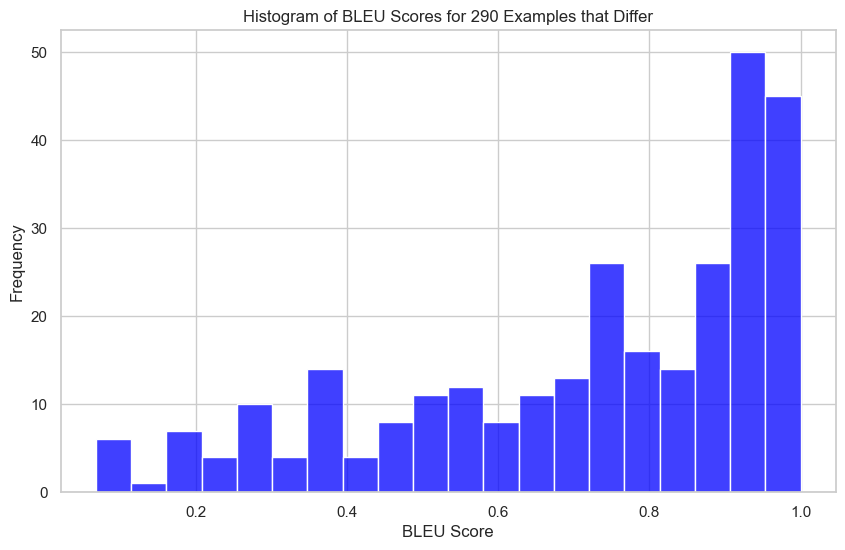

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'comparison' is your DataFrame and it has a column named 'BLEU'

# Set the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(comparison['BLEU'], kde=False, color='blue', bins=20)

# Adding titles and labels
plt.title('Histogram of BLEU Scores for 290 Examples that Differ')
plt.xlabel('BLEU Score')
plt.ylabel('Frequency')

# Show the plot
plt.show()


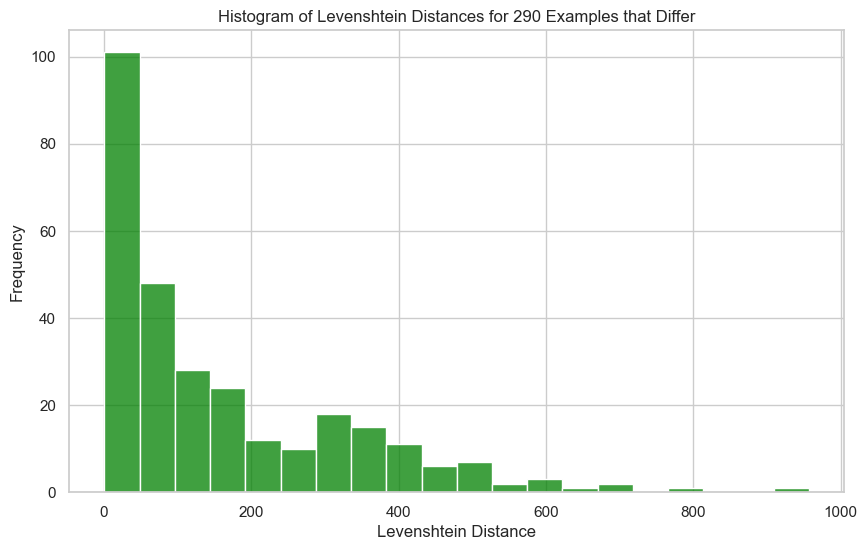

In [47]:
sns.set(style="whitegrid")

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(comparison['Levenshtein'], kde=False, color='green', bins=20)

# Adding titles and labels
plt.title('Histogram of Levenshtein Distances for 290 Examples that Differ')
plt.xlabel('Levenshtein Distance')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [48]:
same_mask = df['CoT for Changed Prompt'] == trial_2['CoT for Changed Prompt']

same_df = df[same_mask]
same_trial_2 = trial_2[same_mask]

equivalent_comparison = pd.concat([same_df['CoT for Changed Prompt'], 
                                   same_trial_2['CoT for Changed Prompt']], 
                                   axis=1)

equivalent_comparison.columns = ['trial_1_CoT', 'trial_2_CoT']

# Function to calculate BLEU score
def calculate_bleu(reference, candidate):
    reference_tokens = reference.split()
    candidate_tokens = candidate.split()
    return sentence_bleu([reference_tokens], candidate_tokens)

# Function to calculate Levenshtein distance
def calculate_levenshtein(str1, str2):
    return Levenshtein.distance(str1, str2)

# Apply the functions to each row
equivalent_comparison['Levenshtein'] = equivalent_comparison.apply(lambda row: calculate_levenshtein(row['trial_1_CoT'], row['trial_2_CoT']), axis=1)
equivalent_comparison['BLEU'] = equivalent_comparison.apply(lambda row: calculate_bleu(row['trial_1_CoT'], row['trial_2_CoT']), axis=1)

# Check if all Levenshtein distances are 0
all_levenshtein_zero = (equivalent_comparison['Levenshtein'] == 0).all()
print("All Levenshtein distances are 0:", all_levenshtein_zero)

# Check if all BLEU scores are 1
all_bleu_one = (equivalent_comparison['BLEU'] == 1).all()
print("All BLEU scores are 1:", all_bleu_one)

All Levenshtein distances are 0: True
All BLEU scores are 1: True


In [49]:
len(same_df)

550

<details>
<summary>Next Section</summary>

## This is your section heading

- Point 1
- Point 2
- Here you can add text, code snippets, images, etc., that you want to be collapsible.

</details>